In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from urllib.request import urlopen
import plotly.express as px

In [16]:
#read dataset 'df'
df = pd.read_csv('df_avocado.csv', index_col = 0)

In [18]:
df.head()

Date  AveragePrice  Total Volume     4046      4225     4770  \
11569  2015-01-04          1.75      27365.89  9307.34   3844.81   615.28   
9593   2015-01-04          1.49      17723.17  1189.35  15628.27     0.00   
10009  2015-01-04          1.68       2896.72   161.68    206.96     0.00   
1819   2015-01-04          1.52      54956.80  3013.04  35456.88  1561.70   
9333   2015-01-04          1.64       1505.12     1.27   1129.50     0.00   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
11569    13598.46    13061.10      537.36          0.0       organic  2015   
9593       905.55      905.55        0.00          0.0       organic  2015   
10009     2528.08     2528.08        0.00          0.0       organic  2015   
1819     14925.18    11264.80     3660.38          0.0  conventional  2015   
9333       374.35      186.67      187.68          0.0       organic  2015   

                   region  
11569           Southeast  
9593              Chicago  
10009  HarrisburgScranton  
1819           Pittsburgh  
9333                Boise

## Overview of sales counts
A overview of the data:

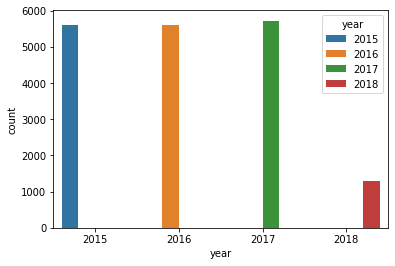

In [19]:
#Count of years
ax, f = plt.subplots()
sns.countplot(x='year',hue = 'year',data=df);

The counts of 2015 to 2016 are similar, 2016 reached the highest point. 2018 only collected 3 months of data, so it's short.

## Overview of Average Price
Let's start to find stories in the data.<br>
First, I am going to check the average price from 2015 to 2018.

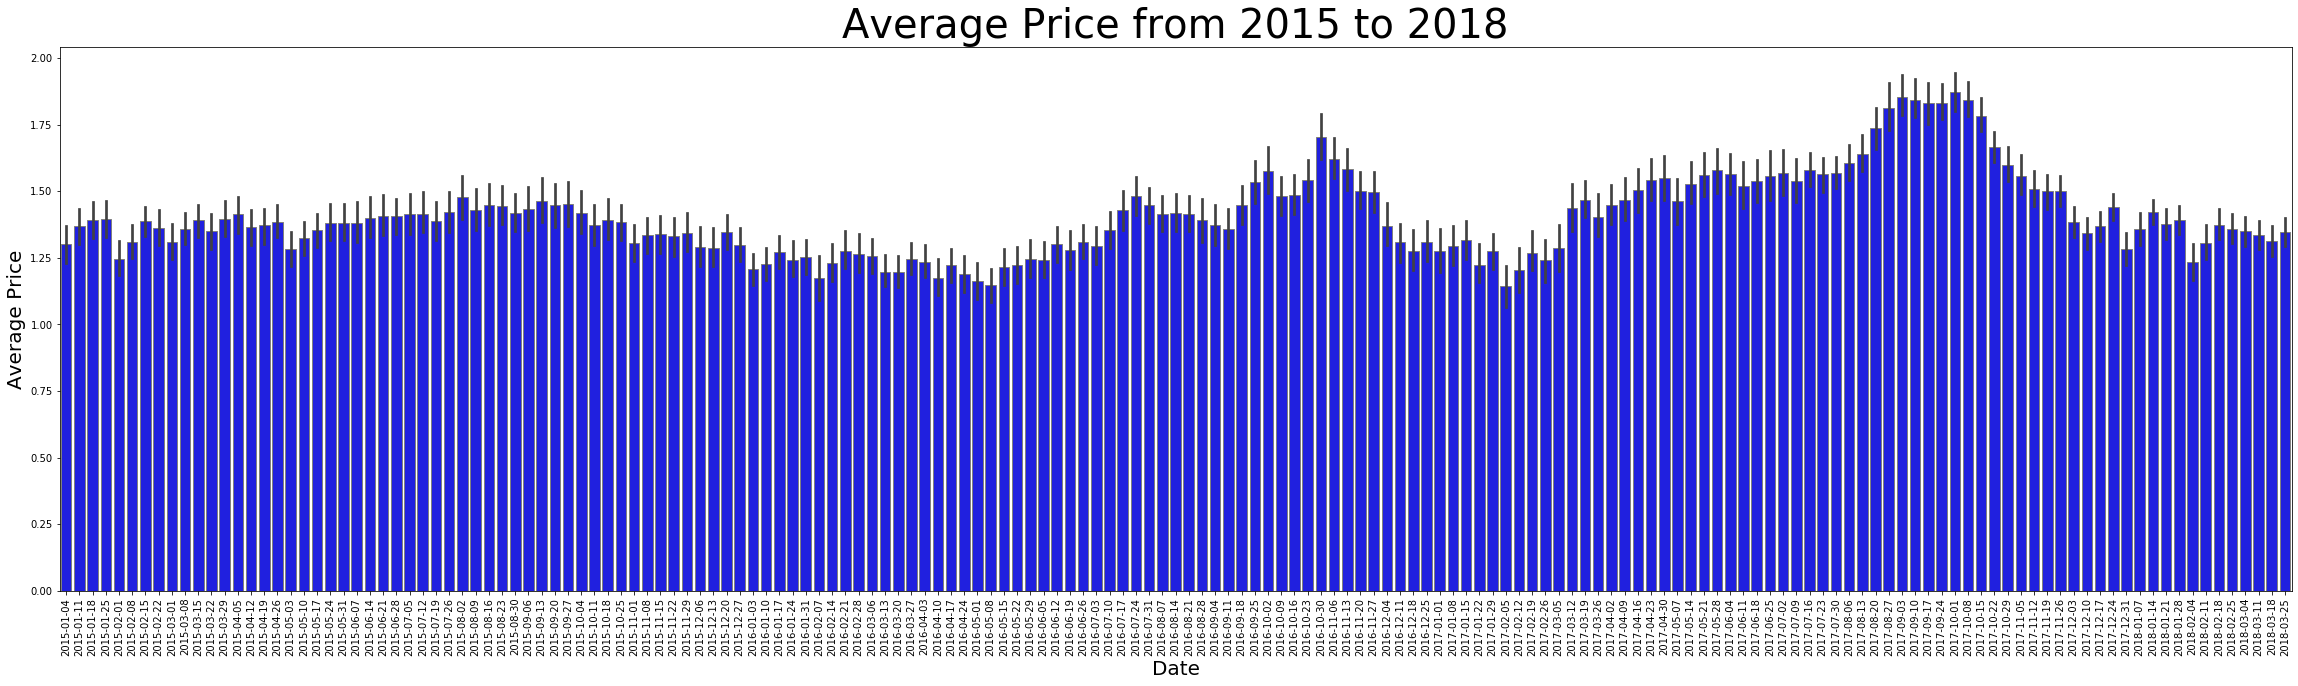

In [20]:
#Draw a plot of average_price fluctuation with the date
f, ax = plt.subplots(figsize=(40,10))
sns.barplot(df['Date'], df['AveragePrice'], data = df, color = 'blue', ec='grey')
plt.title('Average Price from 2015 to 2018', fontsize = 40)
plt.xticks(rotation = 90)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Average Price', fontsize = 20)
plt.show()

Throughout 2015, prices were relatively stable.<br>
From 2016 to 2018, prices showed an upward trend,especially in September 2017, it reached the peak of four years.

## Price affect sales volume
So, does the price fluctuations affect sales volume?

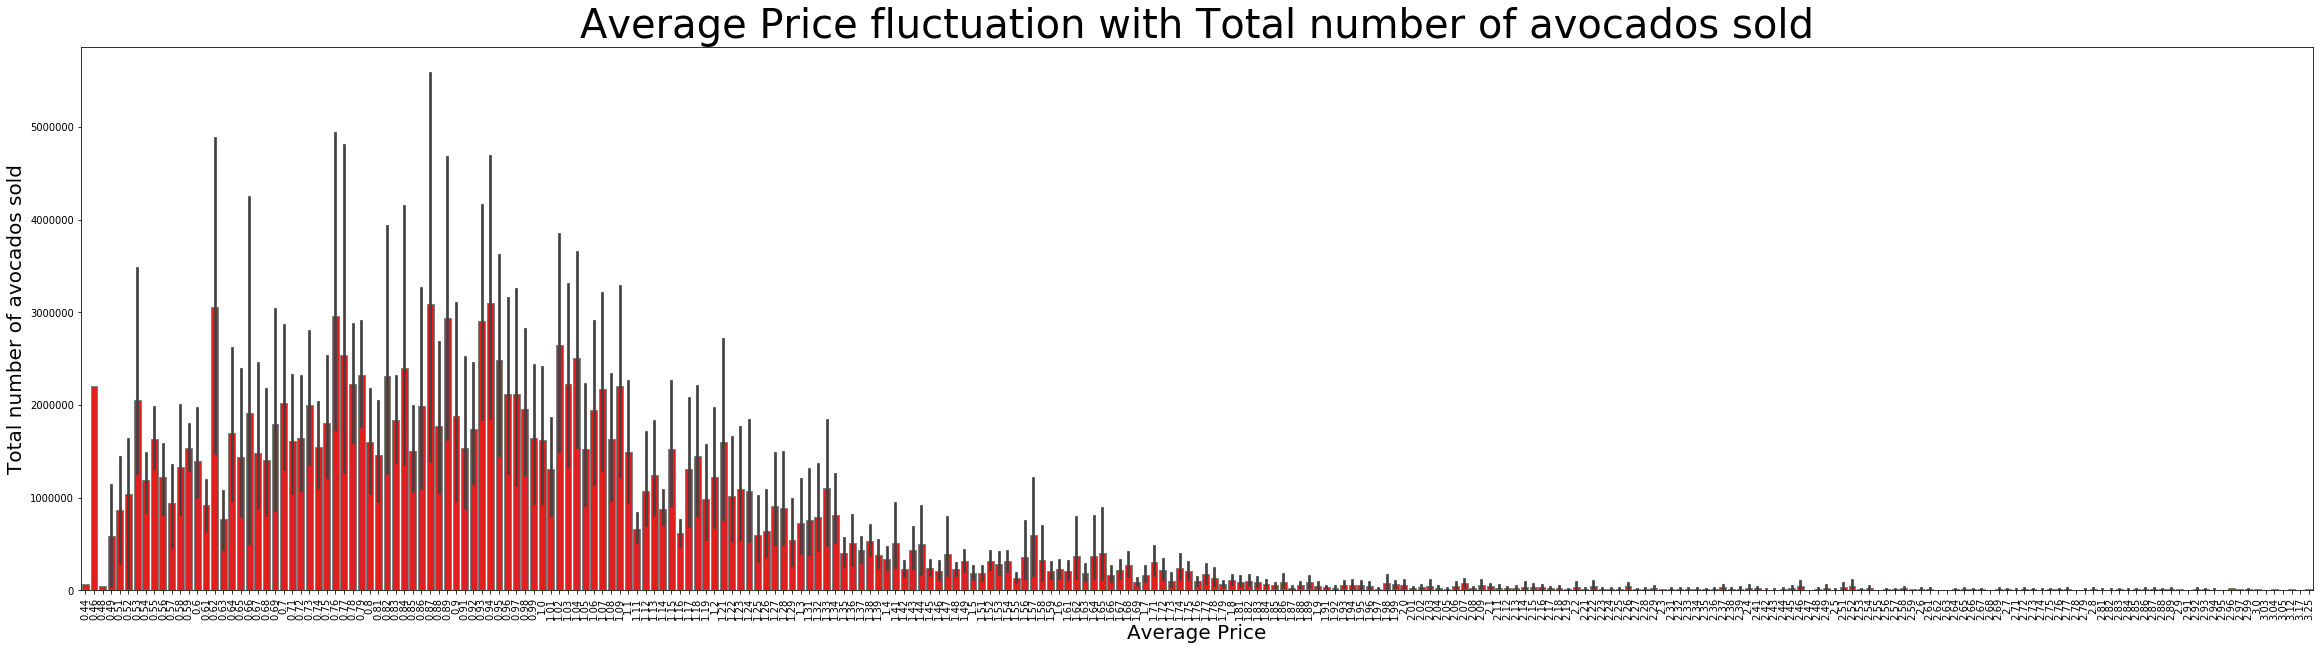

In [21]:
#Draw hist plot to show the relationship
f, ax = plt.subplots(figsize = (40,10))
sns.barplot(df['AveragePrice'],df['Total Volume'],data = df, color = 'red', ec = 'gray')
plt.title('Average Price fluctuation with Total number of avocados sold', fontsize = 40)
plt.xticks(rotation = 90)
plt.xlabel('Average Price', fontsize = 20)
plt.ylabel('Total number of avocados sold', fontsize = 20)
plt.show()

Sales volume does affect price fluctuations: low prices bring high sales, and high prices bring low sales.
But there are some exceptions.<br>
For example:  Price as low as \$0.44 and \\$0.48 cannot bring a higher sales:

In [22]:
df.loc[df['AveragePrice'] == 0.44]

Date  AveragePrice  Total Volume    4046     4225  4770  \
15261  2017-03-05          0.44      64057.04  223.84  4748.88   0.0   

       Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
15261    59084.32      638.68    58445.64          0.0  organic  2017   

                 region  
15261  CincinnatiDayton

In [23]:
df.loc[df['AveragePrice'] == 0.48]

Date  AveragePrice  Total Volume    4046     4225  4770  \
15473  2017-03-05          0.48      50890.73  717.57  4138.84   0.0   

       Total Bags  Small Bags  Large Bags  XLarge Bags     type  year   region  
15473    46034.32     1385.06    44649.26          0.0  organic  2017  Detroit

Two lower Prices  with lower sales occurred in Cincinnati Dayton and Phoenix Tucson, I cannot find any news related local avocado retail market, which may be caused by special circumstances. 

## Regional sales
Sales volumes in cities

In [24]:
#Select total volume and region
df_region = df[['region','Total Volume']]
df_region

region  Total Volume
11569           Southeast      27365.89
9593              Chicago      17723.17
10009  HarrisburgScranton       2896.72
1819           Pittsburgh      54956.80
9333                Boise       1505.12
...                   ...           ...
8574              Chicago     908202.13
9018         SouthCentral    9010588.32
18141        SouthCentral     163496.70
17673          California     190257.38
8814              NewYork    1774776.77

[18249 rows x 2 columns]

Because the data is mixed cities, a few states, big areas and total USA, cities's sales are
already included in large areas, so I only select the cities in the region to do the reasearch.
 

In [25]:
#draw region and sales in map
df['region'].unique()

array(['Southeast', 'Chicago', 'HarrisburgScranton', 'Pittsburgh',
       'Boise', 'WestTexNewMexico', 'LosAngeles', 'LasVegas', 'Atlanta',
       'DallasFtWorth', 'MiamiFtLauderdale', 'Plains', 'StLouis',
       'Syracuse', 'Midsouth', 'Sacramento', 'Boston', 'Charlotte',
       'Spokane', 'Albany', 'Houston', 'SouthCarolina', 'SanFrancisco',
       'TotalUS', 'RaleighGreensboro', 'BuffaloRochester',
       'NorthernNewEngland', 'GrandRapids', 'Denver', 'SanDiego',
       'BaltimoreWashington', 'Roanoke', 'RichmondNorfolk', 'Northeast',
       'SouthCentral', 'GreatLakes', 'Louisville', 'Seattle',
       'CincinnatiDayton', 'NewYork', 'NewOrleansMobile', 'Indianapolis',
       'Jacksonville', 'Columbus', 'Detroit', 'Philadelphia',
       'PhoenixTucson', 'Nashville', 'Portland', 'HartfordSpringfield',
       'Tampa', 'Orlando', 'West', 'California'], dtype=object)

In [26]:
#Select only cities in region
df_cities = df[df['region'].isin(['Chicago', 'HarrisburgScranton', 'Pittsburgh',
       'Boise', 'WestTexNewMexico', 'LosAngeles', 'LasVegas', 'Atlanta',
       'DallasFtWorth', 'MiamiFtLauderdale', 'Plains', 'StLouis',
       'Syracuse', 'Midsouth', 'Sacramento', 'Boston', 'Charlotte',
       'Spokane', 'Albany', 'Houston', 'SouthCarolina', 'SanFrancisco',
       'RaleighGreensboro', 'BuffaloRochester',
       'GrandRapids', 'Denver', 'SanDiego',
       'BaltimoreWashington', 'Roanoke', 'RichmondNorfolk',
       'SouthCentral', 'GreatLakes', 'Louisville', 'Seattle',
       'CincinnatiDayton', 'NewYork', 'NewOrleansMobile', 'Indianapolis',
       'Jacksonville', 'Columbus', 'Detroit', 'Philadelphia',
       'PhoenixTucson', 'Nashvill'])]
df_cities.head()

Date  AveragePrice  Total Volume       4046       4225      4770  \
9593   2015-01-04          1.49      17723.17    1189.35   15628.27      0.00   
10009  2015-01-04          1.68       2896.72     161.68     206.96      0.00   
1819   2015-01-04          1.52      54956.80    3013.04   35456.88   1561.70   
9333   2015-01-04          1.64       1505.12       1.27    1129.50      0.00   
2807   2015-01-04          0.75     758118.95  426878.87  147958.43  15267.89   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
9593       905.55      905.55        0.00          0.0       organic  2015   
10009     2528.08     2528.08        0.00          0.0       organic  2015   
1819     14925.18    11264.80     3660.38          0.0  conventional  2015   
9333       374.35      186.67      187.68          0.0       organic  2015   
2807    168013.76   165202.22     2811.54          0.0  conventional  2015   

                   region  
9593              Chicago  
10009  HarrisburgScranton  
1819           Pittsburgh  
9333                Boise  
2807     WestTexNewMexico

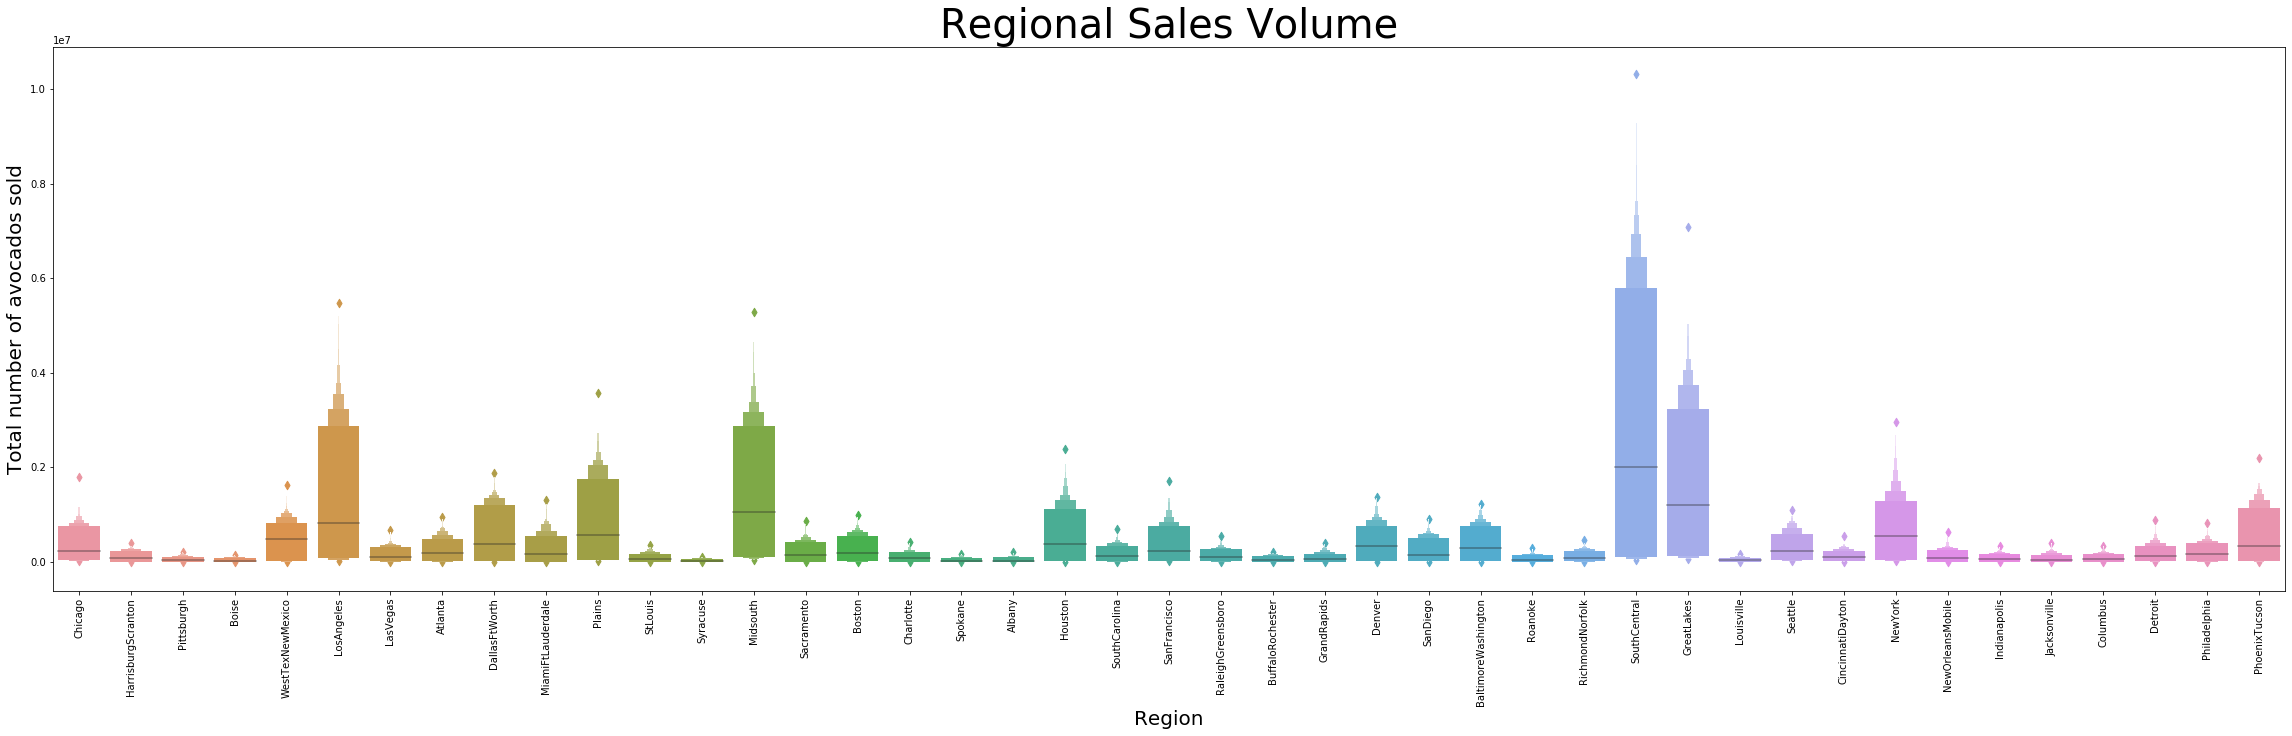

In [27]:
#Draw sales volume in only Cities
f, ax = plt.subplots(figsize = (40,10))
sns.boxenplot(x = 'region', y = 'Total Volume', data = df_cities)
plt.title('Regional Sales Volume', fontsize = 40)
plt.xticks(rotation = 90)
plt.xlabel('Region', fontsize = 20)
plt.ylabel('Total number of avocados sold', fontsize = 20)
plt.show()

South Central is the topest sales city. Cities with better sales are distributed widely, with a certain proportion in the Midwest and Northeast.

I am going to show cities' sales distribution in the map:

In [28]:
#Import cities data file and select useful columns
cityinfo = pd.read_json('cities.json')
cities = cityinfo[['city','latitude','longitude']]

#Replace the city columns's name to 'region'
cities.rename(columns = {'city':'region'}, inplace = True)
cities.head()

region   latitude   longitude
0      New York  40.712784  -74.005941
1   Los Angeles  34.052234 -118.243685
2       Chicago  41.878114  -87.629798
3       Houston  29.760427  -95.369803
4  Philadelphia  39.952584  -75.165222

In [29]:
#Join two dataset together
response = df_region.join(cities.set_index('region'), on = 'region')
response.head()

region  Total Volume   latitude  longitude
11569           Southeast      27365.89        NaN        NaN
9593              Chicago      17723.17  41.878114 -87.629798
10009  HarrisburgScranton       2896.72        NaN        NaN
1819           Pittsburgh      54956.80  40.440625 -79.995886
9333                Boise       1505.12        NaN        NaN

In [30]:
#Draw sales volume in cities
import json

fig = px.scatter_mapbox(response, hover_name='region',
                        hover_data = ['Total Volume'],lat = 'latitude', lon = 'longitude',
      color = 'Total Volume',
                        color_continuous_scale= "Viridis", size_max=15, zoom=3, height=400)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

In the map, It can be clearly seen on the map that sales markets are mainly concentrated in the Northeast and West coast. The reason may be related to the popularity of local food and the dense population of eating.

## Compare sales volume of 3 avocados with PLU codes

Next, I am going to check the sales situations of organic and non-organic in 3 avocado's products with PLU codes: 4046, 4335 and 4770. 

Now draw plots to compare them.

In [31]:
# What's the most sold avocados varieties 
total4046 = df.groupby(by = ['year','type'])['4046'].apply(lambda x: x.sum()).reset_index(name = 'sum')
total4225 = df.groupby(by = ['year','type'])['4225'].apply(lambda x: x.sum()).reset_index(name = 'sum')
total4770 = df.groupby(by = ['year','type'])['4770'].apply(lambda x: x.sum()).reset_index(name = 'sum')
print(total4046.head(), '\n')
print(total4225.head(), '\n')
print(total4770.head() )

   year          type           sum
0  2015  conventional  1.684012e+09
1  2015       organic  2.543770e+07
2  2016  conventional  1.506717e+09
3  2016       organic  1.840599e+07
4  2017  conventional  1.633633e+09 

   year          type           sum
0  2015  conventional  1.722568e+09
1  2015       organic  3.848569e+07
2  2016  conventional  1.626665e+09
3  2016       organic  4.606313e+07
4  2017  conventional  1.500535e+09 

   year          type           sum
0  2015  conventional  1.419177e+08
1  2015       organic  8.546843e+05
2  2016  conventional  1.587665e+08
3  2016       organic  1.113310e+06
4  2017  conventional  9.080494e+07


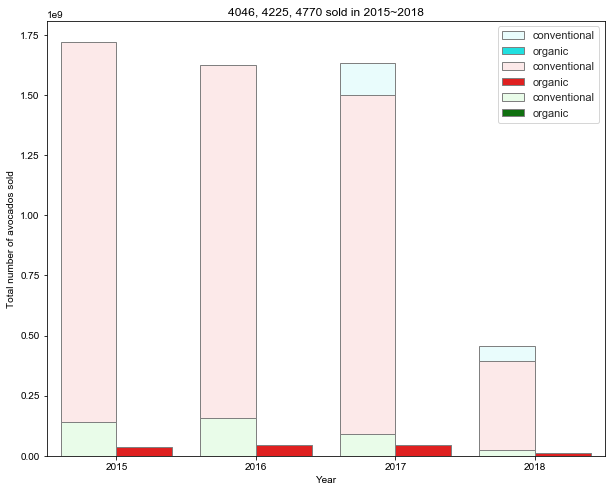

In [32]:
#Draw stack plot of sold avocados varieties
#4046
ax, f = plt.subplots(figsize =(10,8))
sns.set(style="whitegrid", palette="pastel", color_codes=True)

sns.barplot(x = total4046['year'], y = total4046['sum'], hue = 'type',color = 'cyan', data = total4046, ec ='gray') 
plt.legend()
sns.barplot(x = total4225['year'], y = total4225['sum'], hue = 'type', color = 'red', data = total4225, ec ='gray')
plt.legend()
sns.barplot(x = total4770['year'], y = total4770['sum'], hue = 'type', color = 'green', data = total4770, ec ='gray')
plt.legend()
plt.title('4046, 4225, 4770 sold in 2015~2018')
plt.xlabel('Year')
plt.ylabel('Total number of avocados sold')

plt.show()

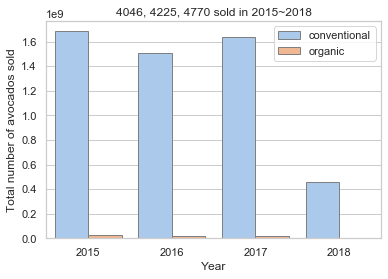

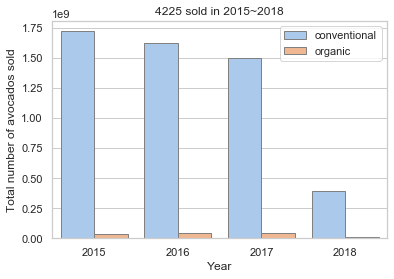

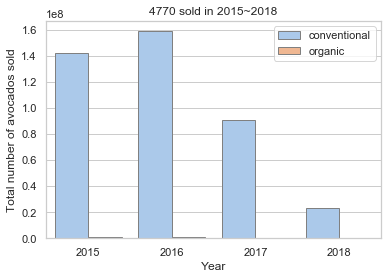

In [33]:
#Draw bar plot of sold avocados varieties
#4046
ax, f = plt.subplots()
sns.set(style="whitegrid", palette="pastel", color_codes=True)

sns.barplot(x = total4046['year'], y = total4046['sum'], hue = 'type',data = total4046, ec ='gray') 
plt.title('4046, 4225, 4770 sold in 2015~2018')
plt.xlabel('Year')
plt.ylabel('Total number of avocados sold')
plt.legend()
plt.show()

#4225
ax, f = plt.subplots()
sns.set(style="whitegrid", palette="pastel", color_codes=True)

sns.barplot(x = total4225['year'], y = total4225['sum'], hue = 'type', ec = 'gray', data = total4225)
plt.title('4225 sold in 2015~2018')
plt.xlabel('Year')
plt.ylabel('Total number of avocados sold')
plt.legend()
plt.show()

#4770
ax, f = plt.subplots()

sns.barplot(x = total4770['year'], y = total4770['sum'], hue = 'type', ec = 'gray',data = total4770)
plt.title('4770 sold in 2015~2018')
plt.xlabel('Year')
plt.ylabel('Total number of avocados sold')
plt.legend()
plt.show()

No matter what kind of avocado, the sales volume of conventional(non-organic) avocados is much higher than organic sold.

## Compare price difference between organic and non-organic

Is that the price caused by the difference of the sales volume between non-organic and organic?
Let's go dig in the price difference of non-organic and organic.

In [34]:
#Check the prices of two types of avocades
priceCon = df[df['type'] == 'conventional']['AveragePrice'].reset_index(name = 'price')
priceOrg = df[df['type'] == 'organic']['AveragePrice'].reset_index(name = 'price')

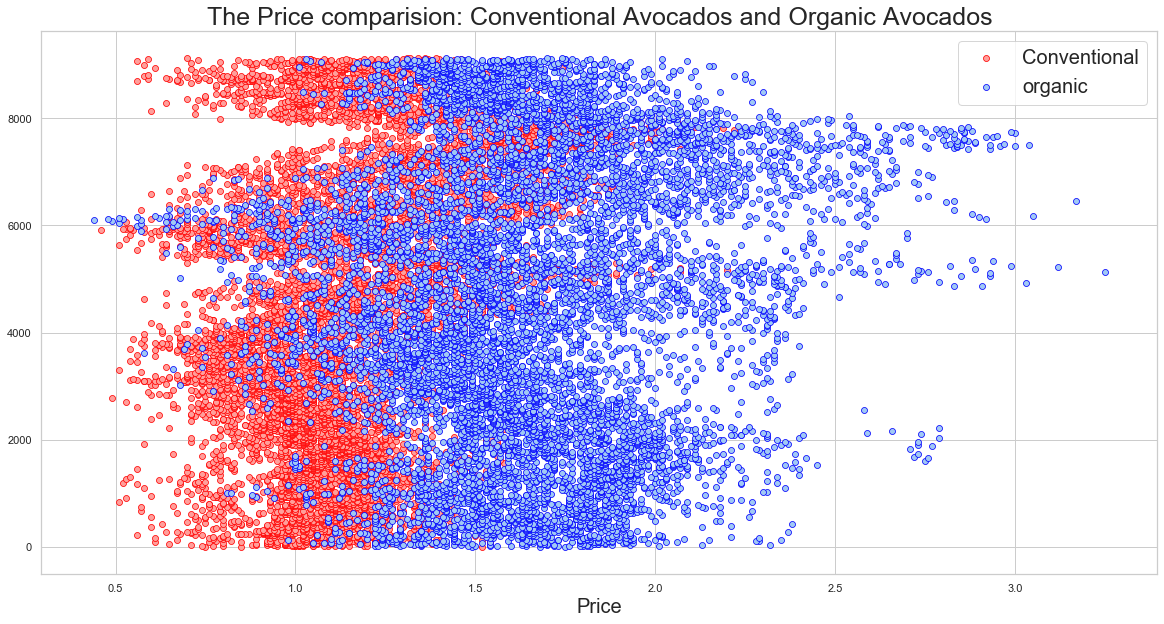

In [35]:
#Draw a plot to compare the price difference
ax,f = plt.subplots(figsize =(20,10))

sns.scatterplot(x = priceCon.price, y = priceCon.index, data = priceCon, color = 'r', ec ='red',label = 'Conventional')
sns.scatterplot(x = priceOrg.price, y = priceOrg.index, data = priceOrg, color = 'b', ec='blue',label = 'organic')

plt.title('The Price comparision: Conventional Avocados and Organic Avocados', fontsize = 25)
plt.xlabel('Price', fontsize = 20)
plt.legend(prop={'size':20})
plt.show()

Although the chart shows that the price of most organic avocados is higher than that of non-organic avocados, it is not difficult to find that the prices of the two kinds of avocados have a large overlap, and both have reached the lowest prices.<br>
Therefore, can I determine that is the price a certain factor that leads to product sales?<br>
I will do a hypothese test for it later.
